In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Cargar los datos desde el archivo txt
file_N1 = "datos_t_inter_Neumann1.txt"
data_N1= pd.read_csv(file_N1, delim_whitespace=True, header=None)
data_N1.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas

file_N2 = "datos_t_inter_Neumann2.txt"
data_N2 = pd.read_csv(file_N2, delim_whitespace=True, header=None)
data_N2.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas


file_N3 = "datos_t_inter_Neumann3.txt"
data_N3 = pd.read_csv(file_N3, delim_whitespace=True, header=None)
data_N3.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas

file_M1 = "datos_t_inter_Moore1.txt"
data_M1 = pd.read_csv(file_M1, delim_whitespace=True, header=None)
data_M1.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas

file_M2 = "datos_t_inter_Moore2.txt"
data_M2 = pd.read_csv(file_M2, delim_whitespace=True, header=None)
data_M2.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas

file_M3 = "datos_t_inter_Moore3.txt"
data_M3 = pd.read_csv(file_M3, delim_whitespace=True, header=None)
data_M3.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas

file_A4 = "datos_t_inter_aleatorios4.txt"
data_A4 = pd.read_csv(file_A4, delim_whitespace=True, header=None)
data_A4.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas

file_A6 = "datos_t_inter_aleatorios6.txt"
data_A6 = pd.read_csv(file_A6, delim_whitespace=True, header=None)
data_A6.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas

file_A8 = "datos_t_inter_aleatorios8.txt"
data_A8 = pd.read_csv(file_A8, delim_whitespace=True, header=None)
data_A8.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas

file_sw2 = "datos_t_inter_small_world_0.250000.txt"
data_sw2 = pd.read_csv(file_sw2, delim_whitespace=True, header=None)
data_sw2.columns = ["L", "P1", "P2", "x","t_int"]  # Nombrar las columnas

file_sw5 = "datos_t_inter_small_world_0.500000.txt"
data_sw5 = pd.read_csv(file_sw5, delim_whitespace=True, header=None)
data_sw5.columns = ["L", "P1", "P2", "x", "t_int"]  # Nombrar las columnas


file_sw7 = "datos_t_inter_small_world_0.750000.txt"
data_sw7 = pd.read_csv(file_sw7, delim_whitespace=True, header=None)
data_sw7.columns = ["L", "P1", "P2", "x", "t_int"]  # Nombrar las columnas


file_AA1 = "datos_t_inter_probabilisticos0.100000.txt"
data_AA1 = pd.read_csv(file_AA1, delim_whitespace=True, header=None)
data_AA1.columns = ["L", "P1", "P2", "x", "t_int"]  # Nombrar las columnas

file_AA2 = "datos_t_inter_probabilisticos0.010000.txt"
data_AA2 = pd.read_csv(file_AA2, delim_whitespace=True, header=None)
data_AA2.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas

file_AA3 = "datos_t_inter_probabilisticos0.050000.txt"
data_AA3 = pd.read_csv(file_AA3, delim_whitespace=True, header=None)
data_AA3.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas

# Neummann 


In [40]:
%matplotlib qt
datasets = [
    (data_N1, "Vecindad de Neumann Radio 1"),
    (data_N2, "Vecindad de Neumann Radio 2"),
    (data_N3, "Vecindad de Neumann Radio 3")]

# Define the grid size (L)
L = 40
# Set the global vmin and vmax for the heatmap color scale
all_t_int_values = pd.concat(
    [data[data["L"] == L]["t_int"] for data, _ in datasets]
)
vmin = all_t_int_values.min()
vmax = all_t_int_values.max()
# Create the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, (data, title) in enumerate(datasets):
    # Filter the data for the current neighborhood
    filtered_data = data[data["L"] == L]

    # Create a pivot table for the heatmap
    heatmap_data = filtered_data.pivot_table(index="P1", columns="P2", values="t_int")

    # Sort the index to prevent the Y-axis from being inverted
    heatmap_data = heatmap_data.sort_index(ascending=False)

    # Plot the heatmap on the current subplot
    sns.heatmap(
        heatmap_data, 
        cmap="coolwarm", 
        cbar=(idx == 2),  # Only show the colorbar for the last subplot
        cbar_kws={'label': 't_int (Tiempo de Intersección)'} if idx == 2 else None,
        ax=axes[idx],
        vmin=vmin, 
        vmax=vmax
    )
    
    # Set titles and labels
    axes[idx].set_title(title)
    axes[idx].set_xlabel("P Regreso")
    if idx == 0:  # Only set Y-axis label for the first subplot
        axes[idx].set_ylabel("P Evaluación")

    else:
        # Clear Y-axis label for all other subplots
        axes[idx].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

# Moore 


In [50]:
datasets = [
    (data_M1, "Vecindad de Moore Radio 1"),
    (data_M2, "Vecindad de Moore Radio 2"),
    (data_M3, "Vecindad de Moore Radio 3")]

# Define the grid size (L)
L = 40
# Set the global vmin and vmax for the heatmap color scale
all_t_int_values = pd.concat(
    [data[data["L"] == L]["t_int"] for data, _ in datasets]
)
vmin = all_t_int_values.min()
vmax = all_t_int_values.max()
# Create the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, (data, title) in enumerate(datasets):
    # Filter the data for the current neighborhood
    filtered_data = data[data["L"] == L]

    # Create a pivot table for the heatmap
    heatmap_data = filtered_data.pivot_table(index="P1", columns="P2", values="t_int")

    # Sort the index to prevent the Y-axis from being inverted
    heatmap_data = heatmap_data.sort_index(ascending=False)

    # Plot the heatmap on the current subplot
    sns.heatmap(
        heatmap_data, 
        cmap="coolwarm", 
        cbar=(idx == 2),  # Only show the colorbar for the last subplot
        cbar_kws={'label': 't_int (Tiempo de Intersección)'} if idx == 2 else None,
        ax=axes[idx],
        vmin=vmin, 
        vmax=vmax
    )
    
    # Set titles and labels
    axes[idx].set_title(title)
    axes[idx].set_xlabel("P Regreso")
    if idx == 0:  # Only set Y-axis label for the first subplot
        axes[idx].set_ylabel("P Evaluación")
    else:
        # Clear Y-axis label for all other subplots
        axes[idx].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

# Redes aleatorias


In [42]:
datasets = [
    (data_A4, "Vecindad aleatoria N=4"),
    (data_A6, "Vecindad aleatoria N=6"),
    (data_A8, "Vecindad aleatoria N=8")]

# Define the grid size (L)
L = 40
# Set the global vmin and vmax for the heatmap color scale
all_t_int_values = pd.concat(
    [data[data["L"] == L]["t_int"] for data, _ in datasets]
)
vmin = all_t_int_values.min()
vmax = all_t_int_values.max()
# Create the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, (data, title) in enumerate(datasets):
    # Filter the data for the current neighborhood
    filtered_data = data[data["L"] == L]

    # Create a pivot table for the heatmap
    heatmap_data = filtered_data.pivot_table(index="P1", columns="P2", values="t_int")

    # Sort the index to prevent the Y-axis from being inverted
    heatmap_data = heatmap_data.sort_index(ascending=False)

    # Plot the heatmap on the current subplot
    sns.heatmap(
        heatmap_data, 
        cmap="coolwarm", 
        cbar=(idx == 2),  # Only show the colorbar for the last subplot
        cbar_kws={'label': 't_int (Tiempo de Intersección)'} if idx == 2 else None,
        ax=axes[idx],
        vmin=vmin, 
        vmax=vmax
    )
    
    # Set titles and labels
    axes[idx].set_title(title)
    axes[idx].set_xlabel("P Regreso")
    if idx == 0:  # Only set Y-axis label for the first subplot
        axes[idx].set_ylabel("P Evaluación")
    else:
        # Clear Y-axis label for all other subplots
        axes[idx].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

In [58]:
datasets = [
    (data_sw2, "Vecindad Neumann R1-SW=0.25"),
    (data_sw5, "Vecindad Neumann R1-SW=0.50"),
    (data_sw7, "Vecindad Neumann R1-SW=0.75")]

# Define the grid size (L)
L = 40
# Set the global vmin and vmax for the heatmap color scale
all_t_int_values = pd.concat(
    [data[data["L"] == L]["t_int"] for data, _ in datasets]
)
vmin = all_t_int_values.min()
vmax = all_t_int_values.max()
# Create the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, (data, title) in enumerate(datasets):
    # Filter the data for the current neighborhood
    filtered_data = data[data["L"] == L]

    # Create a pivot table for the heatmap
    heatmap_data = filtered_data.pivot_table(index="P1", columns="P2", values="t_int")

    # Sort the index to prevent the Y-axis from being inverted
    heatmap_data = heatmap_data.sort_index(ascending=False)

    # Plot the heatmap on the current subplot
    sns.heatmap(
        heatmap_data, 
        cmap="coolwarm", 
        cbar=(idx == 2),  # Only show the colorbar for the last subplot
        cbar_kws={'label': 't_int (Tiempo de Intersección)'} if idx == 2 else None,
        ax=axes[idx],
        vmin=vmin, 
        vmax=vmax
    )
    
    # Set titles and labels
    axes[idx].set_title(title)
    axes[idx].set_xlabel("P Regreso")
    if idx == 0:  # Only set Y-axis label for the first subplot
        axes[idx].set_ylabel("P Evaluación")
    else:
        # Clear Y-axis label for all other subplots
        axes[idx].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

In [61]:
datasets = [
    (data_AA1, "Vecindad A=0.01"),
    (data_AA2, "Vecindad A =0.05"),
    (data_AA3, "Vecindad A 0.1")]

# Define the grid size (L)
L = 40
# Set the global vmin and vmax for the heatmap color scale
all_t_int_values = pd.concat(
    [data[data["L"] == L]["t_int"] for data, _ in datasets]
)
vmin = all_t_int_values.min()
vmax = all_t_int_values.max()
# Create the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, (data, title) in enumerate(datasets):
    # Filter the data for the current neighborhood
    filtered_data = data[data["L"] == L]

    # Create a pivot table for the heatmap
    heatmap_data = filtered_data.pivot_table(index="P1", columns="P2", values="t_int")

    # Sort the index to prevent the Y-axis from being inverted
    heatmap_data = heatmap_data.sort_index(ascending=False)

    # Plot the heatmap on the current subplot
    sns.heatmap(
        heatmap_data, 
        cmap="coolwarm", 
        cbar=(idx == 2),  # Only show the colorbar for the last subplot
        cbar_kws={'label': 't_int (Tiempo de Intersección)'} if idx == 2 else None,
        ax=axes[idx],
        vmin=vmin, 
        vmax=vmax
    )
    
    # Set titles and labels
    axes[idx].set_title(title)
    axes[idx].set_xlabel("P Regreso")
    if idx == 0:  # Only set Y-axis label for the first subplot
        axes[idx].set_ylabel("P Evaluación")
    else:
        # Clear Y-axis label for all other subplots
        axes[idx].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

# Neumann 3


In [32]:
# Filtrar los datos
filtered_data = data_N3[(data_N3["L"] == L)]
# Crear una tabla pivote con P1 (evaluación) en el eje X, P2 (regreso) en el eje Y y t_int como el valor
heatmap_data = filtered_data.pivot_table(index="P2", columns="P1", values="t_int")
# Revertir el orden del índice para que el eje Y no esté al revés
heatmap_data = heatmap_data.sort_index(ascending=False)

# Graficar el heatmap sin anotaciones
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="rocket", cbar_kws={'label': 't_int (Tiempo de Intersección)'})
plt.title(f"Relación entre P evaluación, P regreso y t_int para L={L} {file_N3[-12:-4]}")
plt.xlabel("P evaluación")
plt.ylabel("P regreso")
plt.show()


In [52]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt
file_N1 = "datos_t_inter_probabilisticos0.100000.txt"
data_N1= pd.read_csv(file_N1, delim_whitespace=True, header=None)
data_N1.columns = ["L", "P1", "P2","x", "t_int"]  # Nombrar las columnas
# Filtrar los datos
filtered_data = data_N1[(data_N1["L"] == 40)]

# Crear las variables para los ejes
P1 = filtered_data["P1"]
P2 = filtered_data["P2"]
t_int = filtered_data["t_int"]

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos en el gráfico 3D
scatter = ax.scatter(P1, P2, t_int, c=t_int, cmap="viridis", s=50)

# Etiquetas de los ejes
ax.set_title(f"Relación 3D {file_N1}")
ax.set_xlabel("P evaluación")
ax.set_ylabel("P regreso")
ax.set_zlabel("t_int (Tiempo de Intersección)")

# Agregar una barra de colores para representar t_int
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("t_int (Tiempo de Intersección)")

plt.show()


In [59]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
file_N1 = "datos_t_inter_probabilisticos0.010000.txt"
data_N1= pd.read_csv(file_N1, delim_whitespace=True, header=None)
data_N1.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas
# Filtrar los datos
filtered_data = data_N1[(data_N1["L"] == 40)]

# Crear las variables para los ejes
P1 = filtered_data["P1"]
P2 = filtered_data["P2"]
t_int = filtered_data["t_int"]

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos en el gráfico 3D
scatter = ax.scatter(P1, P2, t_int, c=t_int, cmap="viridis", s=50)

# Etiquetas de los ejes
ax.set_title(f"Relación 3D {file_N1}")
ax.set_xlabel("P evaluación")
ax.set_ylabel("P regreso")
ax.set_zlabel("t_int (Tiempo de Intersección)")

# Agregar una barra de colores para representar t_int
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("t_int (Tiempo de Intersección)")

plt.show()


In [55]:

file_N1 = "datos_t_inter_Neumann2.txt"
data_N1= pd.read_csv(file_N1, delim_whitespace=True, header=None)
data_N1.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas
# Filtrar los datos
filtered_data = data_N1[(data_N1["L"] == 40)]

# Crear las variables para los ejes
P1 = filtered_data["P1"]    
P2 = filtered_data["P2"]
t_int = filtered_data["t_int"]

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos en el gráfico 3D
scatter = ax.scatter(P1, P2, t_int, c=t_int, cmap="viridis", s=50)

# Etiquetas de los ejes
ax.set_title(f"Relación 3D {file_N1}")
ax.set_xlabel("P evaluación")
ax.set_ylabel("P regreso")
ax.set_zlabel("t_int (Tiempo de Intersección)")

# Agregar una barra de colores para representar t_int
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("t_int (Tiempo de Intersección)")

plt.show()

In [57]:
file_N1 = "datos_t_inter_Neumann3.txt"
data_N1= pd.read_csv(file_N1, delim_whitespace=True, header=None)
data_N1.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas
# Filtrar los datos
filtered_data = data_N1[(data_N1["L"] == 40)]

# Crear las variables para los ejes
P1 = filtered_data["P1"]    
P2 = filtered_data["P2"]
t_int = filtered_data["t_int"]

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos en el gráfico 3D
scatter = ax.scatter(P1, P2, t_int, c=t_int, cmap="viridis", s=50)

# Etiquetas de los ejes
ax.set_title(f"Relación 3D {file_N1}")
ax.set_xlabel("P evaluación")
ax.set_ylabel("P regreso")
ax.set_zlabel("t_int (Tiempo de Intersección)")

# Agregar una barra de colores para representar t_int
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("t_int (Tiempo de Intersección)")

plt.show()

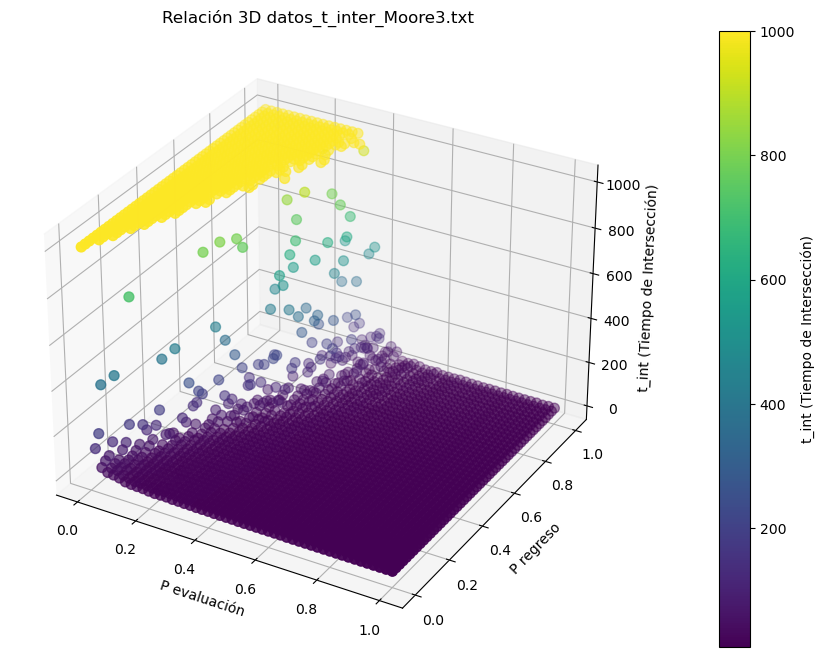

In [16]:
file_N1 = "datos_t_inter_Moore3.txt"
data_N1= pd.read_csv(file_N1, delim_whitespace=True, header=None)
data_N1.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas
# Filtrar los datos
filtered_data = data_N1[(data_N1["L"] == 40)]

# Crear las variables para los ejes
P1 = filtered_data["P1"]    
P2 = filtered_data["P2"]
t_int = filtered_data["t_int"]

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos en el gráfico 3D
scatter = ax.scatter(P1, P2, t_int, c=t_int, cmap="viridis", s=50)

# Etiquetas de los ejes
ax.set_title(f"Relación 3D {file_N1}")
ax.set_xlabel("P evaluación")
ax.set_ylabel("P regreso")
ax.set_zlabel("t_int (Tiempo de Intersección)")

# Agregar una barra de colores para representar t_int
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("t_int (Tiempo de Intersección)")

plt.show()

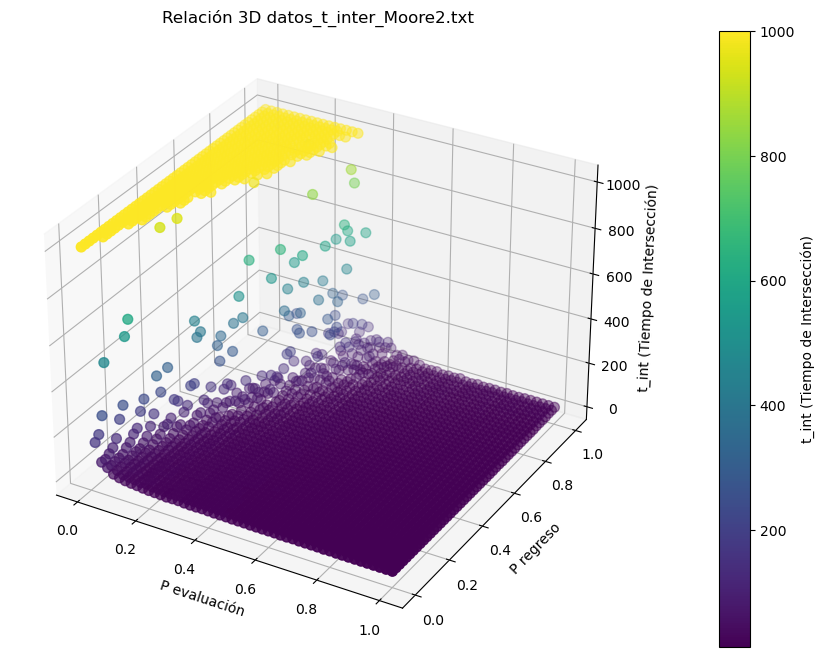

In [17]:
file_N1 = "datos_t_inter_Moore2.txt"
data_N1= pd.read_csv(file_N1, delim_whitespace=True, header=None)
data_N1.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas
# Filtrar los datos
filtered_data = data_N1[(data_N1["L"] == 40)]

# Crear las variables para los ejes
P1 = filtered_data["P1"]    
P2 = filtered_data["P2"]
t_int = filtered_data["t_int"]

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos en el gráfico 3D
scatter = ax.scatter(P1, P2, t_int, c=t_int, cmap="viridis", s=50)

# Etiquetas de los ejes
ax.set_title(f"Relación 3D {file_N1}")
ax.set_xlabel("P evaluación")
ax.set_ylabel("P regreso")
ax.set_zlabel("t_int (Tiempo de Intersección)")

# Agregar una barra de colores para representar t_int
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("t_int (Tiempo de Intersección)")

plt.show()

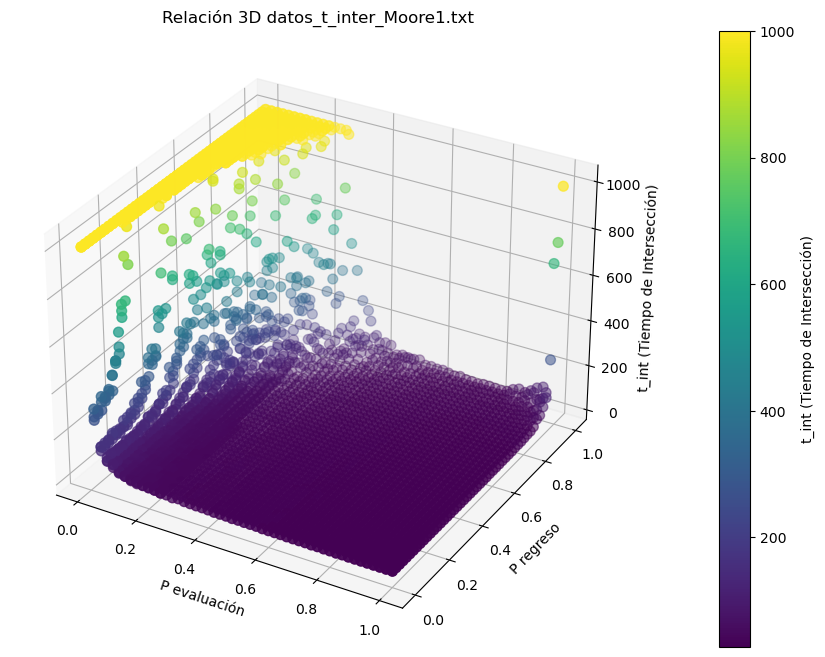

In [18]:
file_N1 = "datos_t_inter_Moore1.txt"
data_N1= pd.read_csv(file_N1, delim_whitespace=True, header=None)
data_N1.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas
# Filtrar los datos
filtered_data = data_N1[(data_N1["L"] == 40)]

# Crear las variables para los ejes
P1 = filtered_data["P1"]    
P2 = filtered_data["P2"]
t_int = filtered_data["t_int"]

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos en el gráfico 3D
scatter = ax.scatter(P1, P2, t_int, c=t_int, cmap="viridis", s=50)

# Etiquetas de los ejes
ax.set_title(f"Relación 3D {file_N1}")
ax.set_xlabel("P evaluación")
ax.set_ylabel("P regreso")
ax.set_zlabel("t_int (Tiempo de Intersección)")

# Agregar una barra de colores para representar t_int
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("t_int (Tiempo de Intersección)")

plt.show()

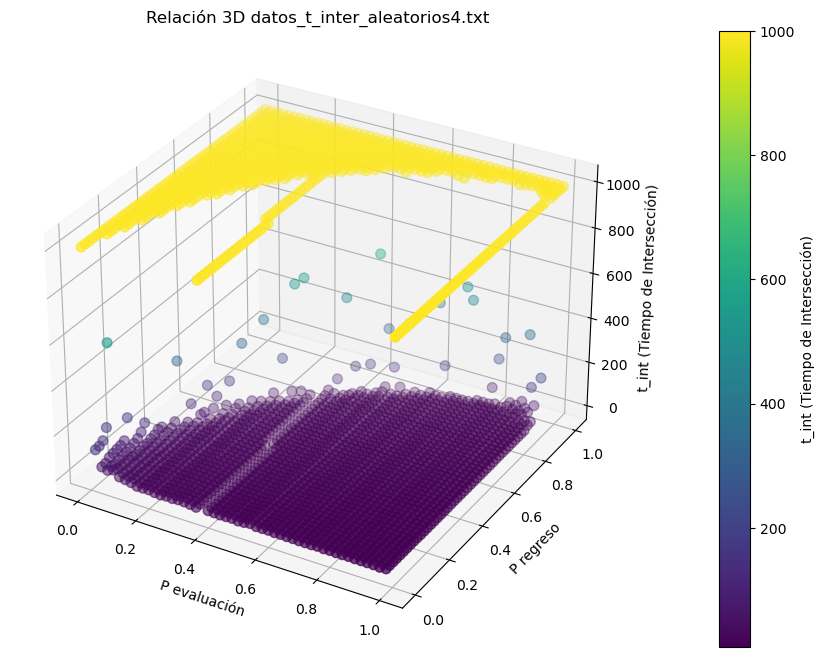

In [19]:
file_N1 = "datos_t_inter_aleatorios4.txt"
data_N1= pd.read_csv(file_N1, delim_whitespace=True, header=None)
data_N1.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas
# Filtrar los datos
filtered_data = data_N1[(data_N1["L"] == 40)]

# Crear las variables para los ejes
P1 = filtered_data["P1"]    
P2 = filtered_data["P2"]
t_int = filtered_data["t_int"]

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos en el gráfico 3D
scatter = ax.scatter(P1, P2, t_int, c=t_int, cmap="viridis", s=50)

# Etiquetas de los ejes
ax.set_title(f"Relación 3D {file_N1}")
ax.set_xlabel("P evaluación")
ax.set_ylabel("P regreso")
ax.set_zlabel("t_int (Tiempo de Intersección)")

# Agregar una barra de colores para representar t_int
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("t_int (Tiempo de Intersección)")

plt.show()

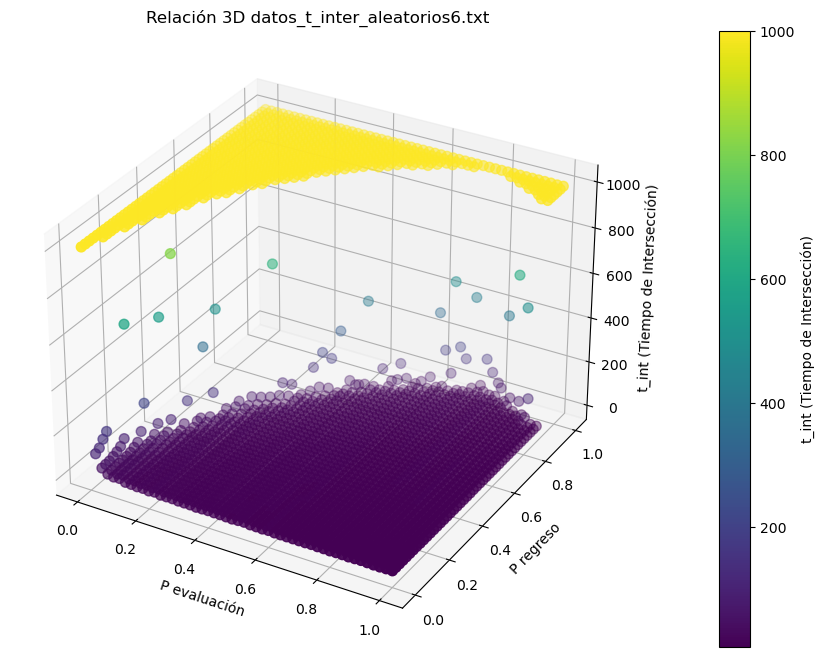

In [20]:
file_N1 = "datos_t_inter_aleatorios6.txt"
data_N1= pd.read_csv(file_N1, delim_whitespace=True, header=None)
data_N1.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas
# Filtrar los datos
filtered_data = data_N1[(data_N1["L"] == 40)]

# Crear las variables para los ejes
P1 = filtered_data["P1"]    
P2 = filtered_data["P2"]
t_int = filtered_data["t_int"]

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos en el gráfico 3D
scatter = ax.scatter(P1, P2, t_int, c=t_int, cmap="viridis", s=50)

# Etiquetas de los ejes
ax.set_title(f"Relación 3D {file_N1}")
ax.set_xlabel("P evaluación")
ax.set_ylabel("P regreso")
ax.set_zlabel("t_int (Tiempo de Intersección)")

# Agregar una barra de colores para representar t_int
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("t_int (Tiempo de Intersección)")

plt.show()

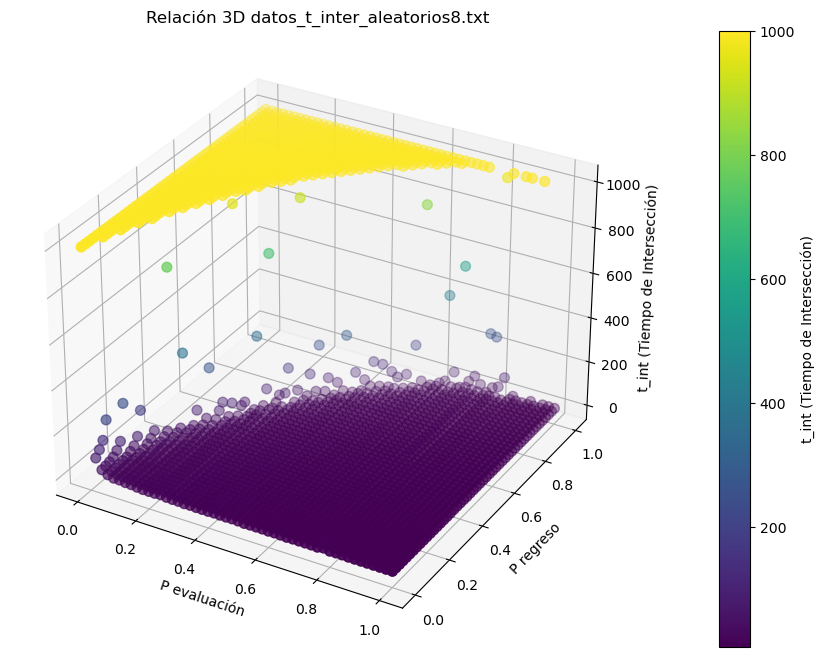

In [21]:
file_N1 = "datos_t_inter_aleatorios8.txt"
data_N1= pd.read_csv(file_N1, delim_whitespace=True, header=None)
data_N1.columns = ["L", "P1", "P2", "t_int"]  # Nombrar las columnas
# Filtrar los datos
filtered_data = data_N1[(data_N1["L"] == 40)]

# Crear las variables para los ejes
P1 = filtered_data["P1"]    
P2 = filtered_data["P2"]
t_int = filtered_data["t_int"]

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos en el gráfico 3D
scatter = ax.scatter(P1, P2, t_int, c=t_int, cmap="viridis", s=50)

# Etiquetas de los ejes
ax.set_title(f"Relación 3D {file_N1}")
ax.set_xlabel("P evaluación")
ax.set_ylabel("P regreso")
ax.set_zlabel("t_int (Tiempo de Intersección)")

# Agregar una barra de colores para representar t_int
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("t_int (Tiempo de Intersección)")

plt.show()

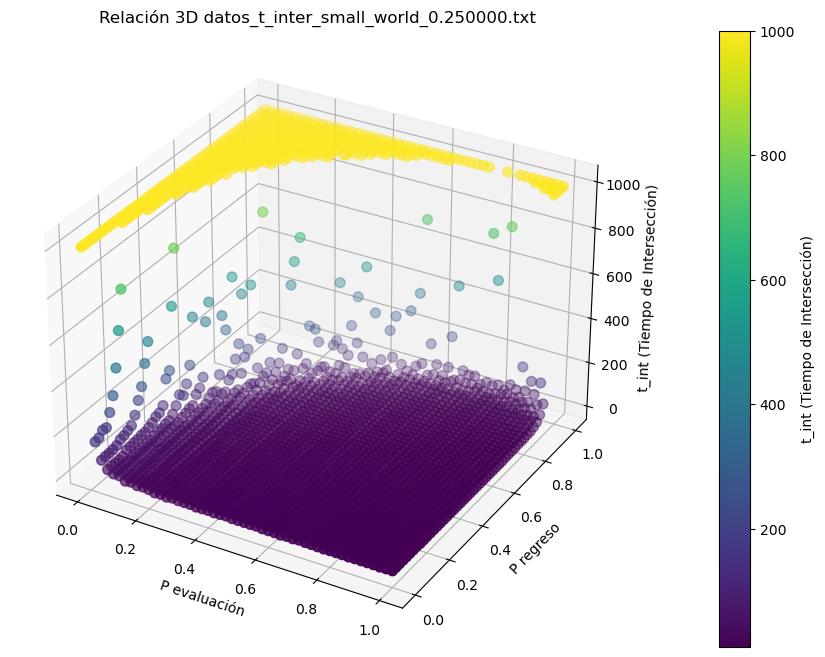

In [23]:
file_N1 = "datos_t_inter_small_world_0.250000.txt"
data_N1= pd.read_csv(file_N1, delim_whitespace=True, header=None)
data_N1.columns = ["L", "P1", "P2","x", "t_int"]  # Nombrar las columnas
# Filtrar los datos
filtered_data = data_N1[(data_N1["L"] == 40)]

# Crear las variables para los ejes
P1 = filtered_data["P1"]    
P2 = filtered_data["P2"]
t_int = filtered_data["t_int"]

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos en el gráfico 3D
scatter = ax.scatter(P1, P2, t_int, c=t_int, cmap="viridis", s=50)

# Etiquetas de los ejes
ax.set_title(f"Relación 3D {file_N1}")
ax.set_xlabel("P evaluación")
ax.set_ylabel("P regreso")
ax.set_zlabel("t_int (Tiempo de Intersección)")

# Agregar una barra de colores para representar t_int
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("t_int (Tiempo de Intersección)")

plt.show()

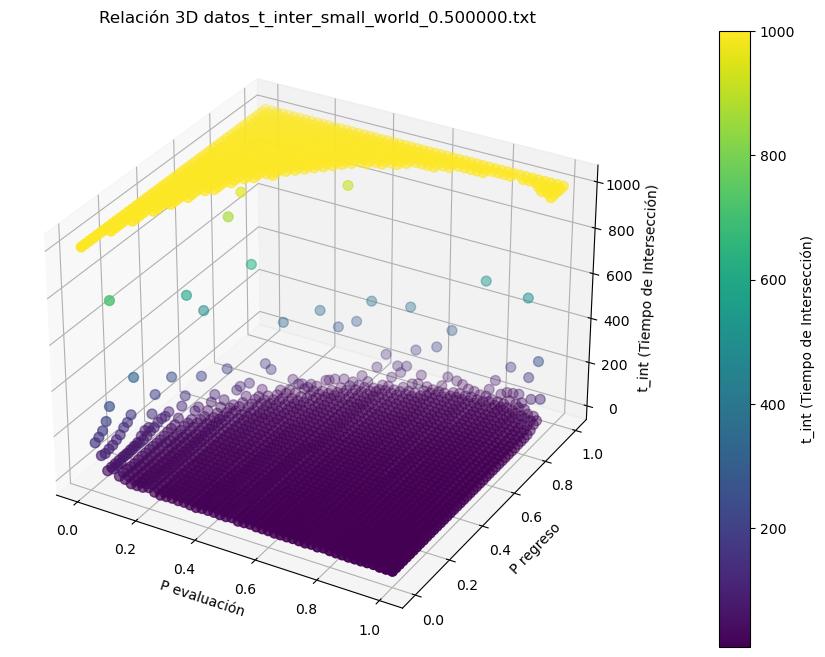

In [24]:
file_N1 = "datos_t_inter_small_world_0.500000.txt"
data_N1= pd.read_csv(file_N1, delim_whitespace=True, header=None)
data_N1.columns = ["L", "P1", "P2","x", "t_int"]  # Nombrar las columnas
# Filtrar los datos
filtered_data = data_N1[(data_N1["L"] == 40)]

# Crear las variables para los ejes
P1 = filtered_data["P1"]    
P2 = filtered_data["P2"]
t_int = filtered_data["t_int"]

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos en el gráfico 3D
scatter = ax.scatter(P1, P2, t_int, c=t_int, cmap="viridis", s=50)

# Etiquetas de los ejes
ax.set_title(f"Relación 3D {file_N1}")
ax.set_xlabel("P evaluación")
ax.set_ylabel("P regreso")
ax.set_zlabel("t_int (Tiempo de Intersección)")

# Agregar una barra de colores para representar t_int
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("t_int (Tiempo de Intersección)")

plt.show()

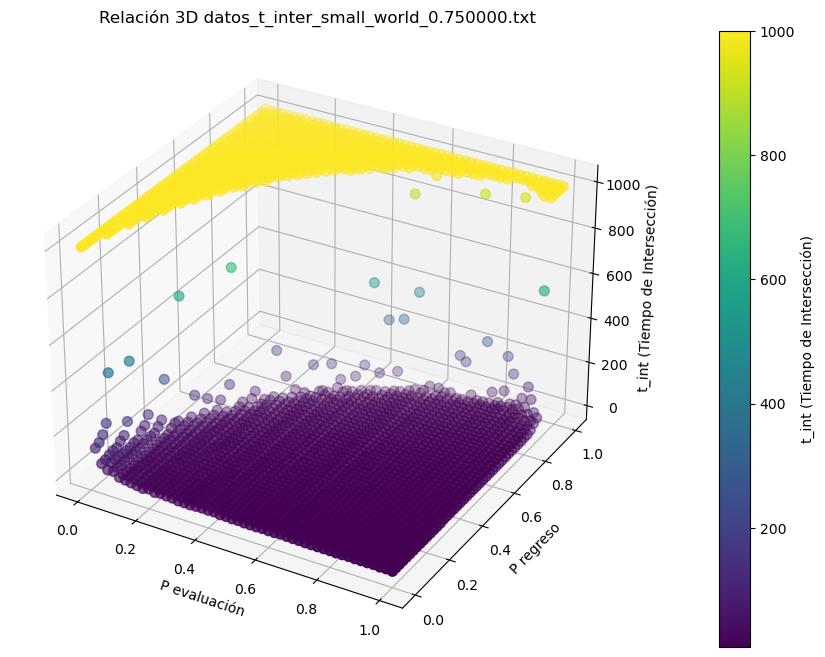

In [26]:
file_N1 = "datos_t_inter_small_world_0.750000.txt"
data_N1= pd.read_csv(file_N1, delim_whitespace=True, header=None)
data_N1.columns = ["L", "P1", "P2","x", "t_int"]  # Nombrar las columnas
# Filtrar los datos
filtered_data = data_N1[(data_N1["L"] == 40)]

# Crear las variables para los ejes
P1 = filtered_data["P1"]    
P2 = filtered_data["P2"]
t_int = filtered_data["t_int"]

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos en el gráfico 3D
scatter = ax.scatter(P1, P2, t_int, c=t_int, cmap="viridis", s=50)

# Etiquetas de los ejes
ax.set_title(f"Relación 3D {file_N1}")
ax.set_xlabel("P evaluación")
ax.set_ylabel("P regreso")
ax.set_zlabel("t_int (Tiempo de Intersección)")

# Agregar una barra de colores para representar t_int
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("t_int (Tiempo de Intersección)")

plt.show()

In [15]:
# Filtrar los datos
filtered_data = data_moore[(data_moore["L"] == 60 )& (data["t_int"] != 100)]

# Crear las variables para los ejes
P1 = filtered_data["P1"]
P2 = filtered_data["P2"]
t_int = filtered_data["t_int"]

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos en el gráfico 3D
scatter = ax.scatter(P1, P2, t_int, c=t_int, cmap="rocket", s=50)

# Etiquetas de los ejes
ax.set_title("Relación 3D entre P evaluación, P regreso y t_int")
ax.set_xlabel("P evaluación")
ax.set_ylabel("P regreso")
ax.set_zlabel("t_int (Tiempo de Interacción)")

# Agregar una barra de colores para representar t_int
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("t_int (Tiempo de Interacción)")

plt.show()

NameError: name 'data_moore' is not defined